# Assignment 3 - AI tools

- Student 1 - Luca Modica
- Student 2 - Hugo Manuel Alves Henriques E Silva

---

## Import libraries

In [1293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from icecream import ic

sns.set_style('darkgrid')
%matplotlib inline

## Reading data

In [1294]:
import os

def read_csv_files(directory):
    csv_files = [file for file in os.listdir(directory) if file.endswith('_labeled.csv')]
    data = {}

    for file in csv_files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        key = file.replace('_labeled.csv', '')
        data[key] = df

    return [file.replace('_labeled.csv', '') for file in csv_files], data

In [1295]:
# with this method we will return an object
# with as property name the city and as
# property value the related dataframe
cities_names, dfs = read_csv_files('./')

print(f'Data from the following cities: {", ".join(cities_names)}.')

Data from the following cities: Shenyang, Guangzhou, Shanghai, Chengdu, Beijing.


In [1296]:
city = 'Beijing'
print(f'Data from {city}: ')
dfs[city].head()

Data from Beijing: 


,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,4,-8.0,79.0,1026.0,-5.0,23.69,0.0,0,0,1,1.0
1,4,-11.0,85.0,1021.0,-9.0,105.93,1.1,0,0,1,0.0
2,4,-21.0,43.0,1030.0,-11.0,117.55,0.0,0,1,0,0.0
3,4,-25.0,33.0,1034.0,-12.0,39.35,0.0,1,0,0,0.0
4,4,-24.0,30.0,1034.0,-10.0,59.00,0.0,1,0,0,0.0


In [1297]:
city = 'Chengdu'
print(f'Data from {city}: ')
dfs[city].head()

Data from Chengdu: 


,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,2,20.0,88.45,1007.1,22.0,1.0,0.0,0,0,0,1.0
1,2,17.0,54.39,1008.1,27.0,5.0,0.0,0,0,0,0.0
2,2,20.0,78.39,1008.1,24.0,2.0,0.0,0,0,0,0.0
3,2,19.0,65.41,1006.1,26.0,2.0,0.0,0,0,0,0.0
4,2,20.0,61.90,1003.1,28.0,2.0,0.0,0,0,0,0.0


In [1298]:
city = 'Guangzhou'
print(f'Data from {city}: ')
dfs[city].head()

Data from Guangzhou: 


,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,3.0,15.2,62.0,1013.9,22.9,7.3,0.0,1,0,0,0.0
1,3.0,10.7,43.0,1013.7,24.0,5.2,0.0,1,0,0,0.0
2,3.0,8.8,42.0,1014.4,22.3,9.2,0.0,1,0,0,0.0
3,3.0,12.1,51.0,1013.2,22.7,9.5,0.0,1,0,0,0.0
4,3.0,15.3,76.0,1011.5,19.6,3.0,0.0,0,1,0,0.0


In [1299]:
city = 'Shanghai'
print(f'Data from {city}: ')
dfs[city].head()

Data from Shanghai: 


,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,4,3.0,57.77,1030.1,11.0,66.0,0.0,1,0,0,0.0
1,4,-2.0,49.22,1032.9,8.0,194.0,0.0,1,0,0,0.0
2,4,-1.0,49.51,1029.1,9.0,2.0,0.0,1,0,0,0.0
3,4,-4.0,42.40,1029.1,8.0,7.0,0.0,1,0,0,0.0
4,4,-4.0,45.40,1028.1,7.0,2.0,0.0,0,1,0,0.0


In [1300]:
city = 'Shenyang'
print(f'Data from {city}: ')
dfs[city].head()

Data from Shenyang: 


,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,1,-3.0,26.98,1010.0,16.0,31.0,0.0,0,0,0,0.0
1,1,6.0,58.54,1008.0,14.0,51.0,0.0,0,0,0,0.0
2,1,0.0,43.60,1006.0,12.0,7.0,0.0,0,1,0,0.0
3,1,2.0,41.43,1011.0,15.0,23.0,0.0,0,1,0,0.0
4,1,-5.0,18.06,1013.0,20.0,28.0,0.0,0,0,1,0.0


## Model implementation

The Python class below will implement the KMeans algorithm.

In [1301]:
import warnings
from sklearn.metrics import normalized_mutual_info_score, silhouette_score
from sklearn.base import BaseEstimator, ClusterMixin, check_array
from sklearn.cluster import kmeans_plusplus

class KMeans(BaseEstimator, ClusterMixin):
    
    def __init__(self, 
        n_centers=2, 
        max_iter=200, 
        init_centroids='random', 
        random_seed=None, 
        distance_metric="euclidean"
        ):
        self.n_centers = n_centers
        self.max_iter = max_iter
        self.init_centroids = init_centroids
        self.random_seed = int(random_seed) if random_seed is not None else None
        self.distance_metric = distance_metric
        

    # ***private methods***
    def _set_distance_func(self, distance_metric):
        if distance_metric == "euclidean":
            self.distance_func_ = euclidean_distance
        elif distance_metric == "manhattan":
            self.distance_func_ = manhattan_distance
        else:
            raise ValueError(f"Unknown distance metric: {self.distance_metric}")

    def _initialize_centroids(self, X):
        if self.init_centroids == 'random':
            if X.shape[0] < self.n_centers:
                warnings.warn(
                    "Number of samples in X is less than the number of centers. \
                        The number of clusters has changed to number of datapoints.", UserWarning)
                self.n_centers = X.shape[0]
            
            # sample "n_centers" datapoints as first centroids positions
            indices = np.random.choice(range(X.shape[0]), size=self.n_centers)
            self.centroids_ = X[indices]
        elif self.init_centroids == 'kmeans++':
            # sample a datapoint as first centroid
            index = np.random.choice(range(X.shape[0]), size=1)
            first_centroid = X[index]
            
            self.centroids_ = self._calculate_kmeans_plus_plus_centroids(
                first_centroid, X)
            # self.centroids_, _ = kmeans_plusplus(X=X, n_clusters=self.n_centers)
        else:
            raise ValueError(f"Unknown centroid initialization method: {self.init_centroids}")

    def _calculate_kmeans_plus_plus_centroids(self, first_centroid, X):
        centroids = np.empty((self.n_centers, self.n_features_in_))
        centroids[0] = first_centroid.squeeze()  # Make sure it's a 1D array

        for i in range(1, self.n_centers):
            # Calculate distances from each point to its nearest centroid
            distances = np.array(
                [np.min([self.distance_func_(x, c) for c in centroids]) for x in X])

            # Normalize the square of these distances to create a probability distribution
            squared_distances = distances**2
            probabilities = squared_distances / np.sum(squared_distances)

            # Randomly select the next centroid based on the probability distribution
            next_centroid_index = np.random.choice(range(X.shape[0]), p=probabilities, size=1)
            centroids[i] = X[next_centroid_index]
        
        return centroids


    # ***public methods***
    def fit(self, X, y=None):
        np.random.seed(self.random_seed)
        X = check_array(X)
        self.n_features_in_ = X.shape[1]
        
        self._set_distance_func(self.distance_metric)
        self._initialize_centroids(X)
        self.orig_centroids_ = self.centroids_
            
        n_iter = 0
        while n_iter < self.max_iter:
            # calculate distance from each point to each centroid
            distances = np.zeros((X.shape[0], self.n_centers))

            for i in range(self.n_centers):
                for j in range(X.shape[0]):
                    distances[j, i] = self.distance_func_(X[j], self.centroids_[i])

            # assign each point to the closest centroid
            self.labels_ = np.argmin(distances, axis=1)

            # calculate new centroids
            new_centroids = np.zeros((self.n_centers, X.shape[1]))
            for i in range(self.n_centers):
                cluster_points = X[self.labels_ == i]
                if cluster_points.size > 0:
                    new_centroids[i] = np.mean(cluster_points, axis=0)
                else:
                    # Handle the empty cluster case
                    new_centroids[i] = X[np.random.choice(range(X.shape[0]), size=1)]

            # if centroids have not changed, stop
            if np.allclose(self.centroids_, new_centroids):
                break

            # otherwise, update centroids and continue
            self.centroids_ = new_centroids
            n_iter += 1

        self.n_iter_ = n_iter
        return self

    def transform(self, X):
        """In this custom KMeans implementation, X wont't be changed.
        The implementaion of the method is for consitency puroposes
        with the sklearn APIs and pipeline purposes to extract the
        data tranformed by previous steps (for example)"""
        X = check_array(X)
        if X.shape[1] != self.n_features_in_:
            raise ValueError("The number of features in transform is different from the number of features in fit.")

        return check_array(X)

    def fit_transform(self, X, y=None):
        """In this custom KMeans implementation, after .fit() X wont't be changed.
        The implementaion of the method is for consitency puroposes
        with the sklearn APIs and pipeline purposes to extract the
        data tranformed by previous steps (for example)"""
        
        return self.fit(X).transform(X)

    def predict(self, X):
        X = check_array(X, accept_sparse=True)

        pred_labels = np.zeros(X.shape[0], dtype=np.dtype("int64"))
        distances = np.zeros((X.shape[0], self.n_centers))

        for i in range(self.n_centers):
            for j in range(X.shape[0]):
                distances[j, i] = self.distance_func_(X[j], self.centroids_[i])

        pred_labels = np.argmin(distances, axis=1)

        return pred_labels

    def score(self, X, y=None, score_metric='inertia'):
        
        if score_metric == 'inertia':
            return inertia_score(X, self.centroids_, self.labels_)
        elif score_metric == 'silhouette':
            return effcient_silhouette_score(X, self.labels_, self.distance_metric)
        elif score_metric == 'nmi':
            return nmi_score(X, y, self.labels_)
        else:
            raise ValueError(f"Unknown score metrix: {score_metric}")


# distance functions
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))


# scoring functions
def inertia_score(X, centroids, labels):
    """Inertia measures the sum of squared distances between each sample and its 
    closest centroid. A lower inertia indicates better clustering."""
    return np.sum((X - centroids[labels]) ** 2)

def custom_silhouette_score(X, labels, n_centers, distance_func):
    """Silhouette score measures how similar an object is to its own cluster 
    (cohesion) compared to other clusters (separation). The silhouette ranges 
    from -1 to 1, where a high value indicates that the object is well matched 
    to its own cluster and poorly matched to neighboring clusters."""

    silhouette_scores = np.zeros(X.shape[0])
    
    for i in range(X.shape[0]):
        #get label of the current point
        label = labels[i]
        intra_distances = [distance_func(X[i], X[j]) for j in range(X.shape[0]) if labels[j] == label and i != j]
        average_intra_cluster_distance = np.mean(intra_distances) if intra_distances else 0
        
        #distance to points in other clusters
        min_distance_other_clusters = np.min([np.mean([distance_func(X[i], X[j]) for j in range(X.shape[0]) if labels[j] == k]) for k in range(n_centers) if k != label])

        if average_intra_cluster_distance or min_distance_other_clusters:
            silhouette_scores[i] = (min_distance_other_clusters - average_intra_cluster_distance) / max(min_distance_other_clusters, average_intra_cluster_distance)
        else:
            silhouette_scores[i] = 0

    return np.mean(silhouette_scores)

def effcient_silhouette_score(X, labels, metric):
    return silhouette_score(X=X, labels=labels, metric=metric)

def nmi_score(X, y, labels):
    """Normalized Mutual Information between the true labels and the predicted clusters 
    divided by the average entropy of the true labels and the predicted clusters"""
    if y is None:
        raise ValueError(f"To compute the NMI score, true labels cannot be None.")

    return normalized_mutual_info_score(y, labels)

## Sanity check

Usage of `check_estimator` to make sure the pattern "fit(), predict(), score()" is followed, alongside the good practises for a new custom cluster algorithm:

In [1302]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(KMeans(random_seed=0))

Down below will define the sklarn pipline that will be used for most of the other tasks. 

In [1303]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_steps = [
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
]

pipe = Pipeline(pipeline_steps)

Function to train and then visualize a 2D dataset. It will return the trained k-means model.

In [1304]:
from sklearn.base import clone

def k_means_visualization(k, X, title, init_centroids='random'):
    # k-means training
    pipeline = clone(pipe)
    pipeline.set_params(kmeans__n_centers=k, kmeans__init_centroids=init_centroids, 
        kmeans__random_seed=42)
    X_scaled = pipeline.fit_transform(X)

    # Visualize the K-Means clusters
    kmeans = pipeline.named_steps['kmeans']
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans.labels_, palette='viridis')
    plt.scatter(kmeans.centroids_[:,0], kmeans.centroids_[:,1], marker="X", c="r", s=80, label="centroids")
    plt.title(title)
    plt.grid(True)
    plt.legend(title='Cluster')

    # highlight clusters' centroids
    plt.scatter(kmeans.centroids_[:,0], kmeans.centroids_[:,1], marker="X", c="r", s=80, label="centroids")

    plt.show()
    return kmeans, X_scaled

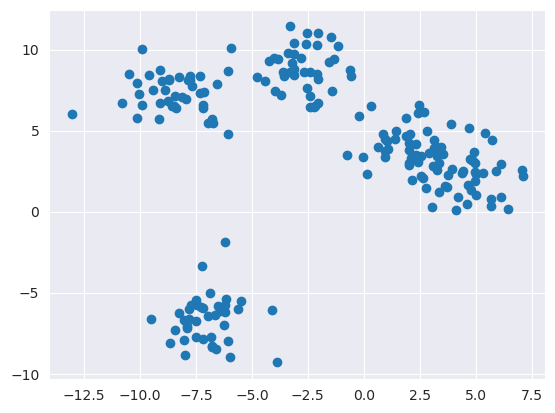

In [1305]:
from sklearn.datasets import make_blobs

# generate 2D data set
k = 5
X, y = make_blobs(
    n_samples=200,
    centers=k,
    cluster_std=1.3,
    random_state=42
)

# plot the data set
plt.scatter(X[:,0], X[:,1])
plt.show()

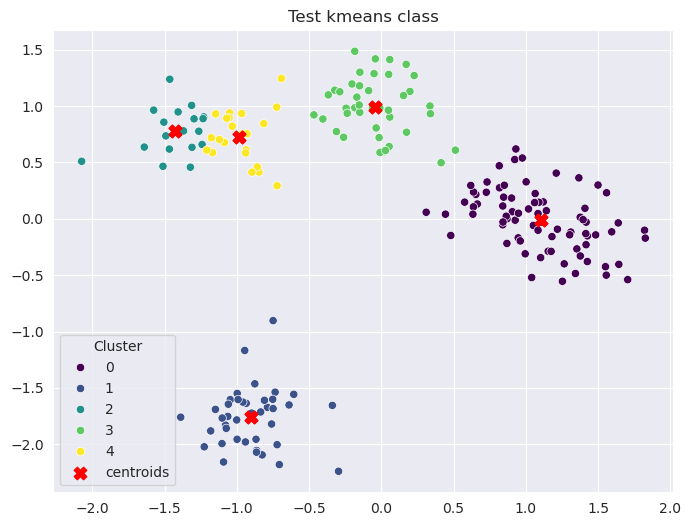

Inertia score: 26.29745092274399
Silhouette score: 0.5947509151548992
NMI score: 0.827951450419066


In [1306]:
kmeans, X_scaled = k_means_visualization(k=k, X=X, init_centroids='kmeans++', title="Test kmeans class")
print(f'Inertia score: {kmeans.score(X_scaled)}')
print(f'Silhouette score: {kmeans.score(X_scaled, score_metric="silhouette")}')
print(f'NMI score: {kmeans.score(X_scaled, y, score_metric="nmi")}')

In [1307]:
print(f"kmeans centroids coordinates: \n {kmeans.centroids_}")
print(f"kmeans labels for each datapoint: \n {kmeans.labels_}")

kmeans centroids coordinates: 
 [[ 1.10274677 -0.01165514]
 [-0.90010829 -1.76121708]
 [-1.42848602  0.77532054]
 [-0.04169148  0.99365005]
 [-0.98207902  0.72445052]]
kmeans labels for each datapoint: 
 [1 3 0 4 0 4 0 0 1 0 0 1 1 1 2 0 3 0 0 2 2 2 0 3 2 3 3 0 3 1 2 4 2 1 3 4 2
 0 4 3 1 0 3 1 1 2 2 0 0 0 0 0 2 3 0 0 3 3 0 2 0 0 1 0 4 0 0 1 0 3 0 3 3 0
 3 2 0 1 0 3 4 3 3 1 1 2 4 4 3 3 1 4 1 0 0 1 0 1 0 3 0 3 0 1 0 0 4 0 1 0 1
 4 3 0 4 3 0 0 0 0 3 3 3 4 2 0 0 0 1 1 3 2 1 2 3 0 0 0 1 1 0 4 0 3 0 0 1 3
 0 0 4 4 3 0 1 0 1 0 0 0 1 0 3 1 1 0 3 0 1 0 0 2 1 4 0 1 4 0 4 0 3 0 4 3 1
 0 0 4 3 0 1 1 4 3 1 3 0 3 0 0]


Clustering validation: we will randomly remove 20% and then 40% of the data, to make sure the cluster will approximately maintain the same shapes.

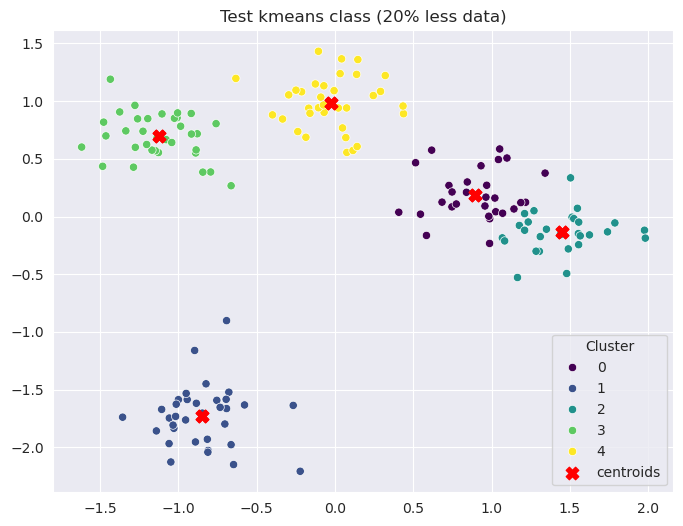

In [1308]:
from sklearn.model_selection import train_test_split

# removing 20% of the dat points randomly
X_filtered, _, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)


# visualization
_, _ = k_means_visualization(k=k, X=X_filtered, init_centroids='kmeans++', title="Test kmeans class (20% less data)")

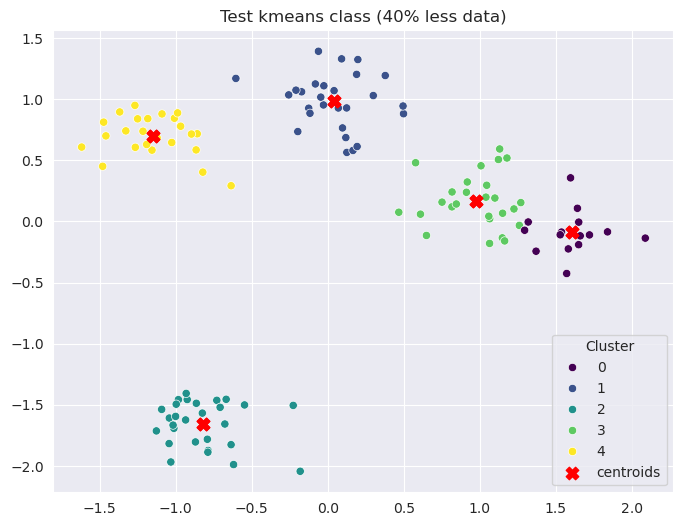

In [1309]:
# removing 40% of the dat points randomly
X_filtered, _, _, _ = train_test_split(X, y, test_size=0.4, random_state=42)


# visualization
_, _ = k_means_visualization(k=k, X=X_filtered, init_centroids='kmeans++', title="Test kmeans class (40% less data)")

## Evaluation

Beijing and Shenyang will be the train and validation set: we can do training on a city and then validate it, and viceversa. Then, Guangzhou and Shanghai are 2 test sets.

In [1310]:
train_data = pd.concat([dfs['Beijing'], dfs['Shenyang']])
X = train_data.drop('PM_HIGH', axis=1)
y = train_data['PM_HIGH']

X.head()

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE
0,4,-8.0,79.0,1026.0,-5.0,23.69,0.0,0,0,1
1,4,-11.0,85.0,1021.0,-9.0,105.93,1.1,0,0,1
2,4,-21.0,43.0,1030.0,-11.0,117.55,0.0,0,1,0
3,4,-25.0,33.0,1034.0,-12.0,39.35,0.0,1,0,0
4,4,-24.0,30.0,1034.0,-10.0,59.00,0.0,1,0,0


In [1311]:
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline = clone(pipe)
# pipeline.set_params(kmeans__n_centers=2,
#                     kmeans__init_centroids='kmeans++', kmeans__random_seed=42)
# X_train_scaled = pipeline.fit_transform(X_train)
# kmeans = pipeline.named_steps['kmeans']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
kmeans = KMeans(n_centers=2, init_centroids='kmeans++', random_seed=42)
kmeans.fit(X_train_scaled)

KMeans(init_centroids='kmeans++', random_seed=42)

assessing the quality of the clustering with the internal cluster scoring:

In [1312]:
print(f'Inertia score: {kmeans.score(X_train_scaled)}')
print(
    f'Silhouette score: {kmeans.score(X_train_scaled, score_metric="silhouette")}')
print(
    f'NMI score: {kmeans.score(X_train_scaled, y_train, score_metric="nmi")}')


Inertia score: 17196.824183523437
Silhouette score: 0.26843214299414797
NMI score: 0.0028264788660817075


scoring on train set:

In [1313]:

y_pred_train = kmeans.predict(X_train_scaled)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.76      0.46      0.57      1687
         1.0       0.30      0.61      0.40       629

    accuracy                           0.50      2316
   macro avg       0.53      0.53      0.48      2316
weighted avg       0.63      0.50      0.52      2316



scoring on validation set:

In [1314]:
y_pred_val = kmeans.predict(X_test_scaled)
print(classification_report(y_test, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.74      0.45      0.56       412
         1.0       0.31      0.61      0.41       167

    accuracy                           0.50       579
   macro avg       0.53      0.53      0.49       579
weighted avg       0.62      0.50      0.52       579



In [1315]:

print(f'Inertia score: {kmeans.score(X_train_scaled)}')
print(f'Silhouette score: {kmeans.score(X_train_scaled, score_metric="silhouette")}')
print(f'NMI score: {kmeans.score(X_train_scaled, y_train, score_metric="nmi")}')


Inertia score: 17196.824183523437
Silhouette score: 0.26843214299414797
NMI score: 0.0028264788660817075


Now KMeans will be evaluated on the 2 test set (Guangzhou and Shanghai).

In [1316]:
X_guangzhou = dfs['Guangzhou']
X_guangzhou = X_guangzhou.drop('PM_HIGH', axis=1)
X_guangzhou_scaled = scaler.transform(X_guangzhou)
y_guangzhou = dfs['Guangzhou']['PM_HIGH']
y_pred_guangzhou = kmeans.predict(X_guangzhou_scaled)
print(classification_report(y_guangzhou, y_pred_guangzhou))

              precision    recall  f1-score   support

         0.0       0.95      0.10      0.18      1266
         1.0       0.07      0.93      0.12        86

    accuracy                           0.15      1352
   macro avg       0.51      0.52      0.15      1352
weighted avg       0.90      0.15      0.18      1352



In [1158]:
X_shanghai = dfs['Shanghai']
X_shanghai = X_shanghai.drop('PM_HIGH', axis=1)
X_shanghai_scaled = scaler.transform(X_shanghai)
y_shanghai = dfs['Shanghai']['PM_HIGH']
y_pred_shanghai = kmeans.predict(X_shanghai_scaled)
print(classification_report(y_shanghai, y_pred_shanghai))

              precision    recall  f1-score   support

         0.0       0.80      0.27      0.41      1218
         1.0       0.05      0.36      0.09       133

    accuracy                           0.28      1351
   macro avg       0.42      0.32      0.25      1351
weighted avg       0.72      0.28      0.38      1351

